In [92]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, mode, skew 
import plotly.express as px
import seaborn as sns

In [93]:
df=pd.read_csv(r"D:\AI\salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Analyst,142000,USD,142000,US,0,US,M
1,2025,MI,FT,Analyst,87000,USD,87000,US,0,US,M
2,2025,SE,FT,Data Quality Lead,218700,USD,218700,US,0,US,M
3,2025,SE,FT,Data Quality Lead,163200,USD,163200,US,0,US,M
4,2025,MI,FT,Data Quality Specialist,121524,USD,121524,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
146343,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
146344,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
146345,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
146346,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# EDA

In [94]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,146348.000000,1.463480e+05,146348.000000,146348.000000
mean,2024.415646,1.629267e+05,157485.290691,20.901550
std,0.674981,2.106091e+05,74134.134223,40.591728
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106000.000000,0.000000
50%,2025.000000,1.470000e+05,146100.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [95]:
df["salary_in_usd"].mode()

0    160000
Name: salary_in_usd, dtype: int64

### Right Skew with salary
- mean > median > mode
- 1.629267e+05 > 	1.470000e+05	> 160000


In [96]:
mean_val = np.mean(df["salary"])
median_val = np.median(df["salary"])
mode_val = mode(df["salary"], keepdims=True).mode[0]
skewness_val = skew(df["salary"])

print(mean_val)
print(median_val)
print(mode_val)
print(skewness_val)

162926.67171399677
147000.0
160000
62.91550575749154


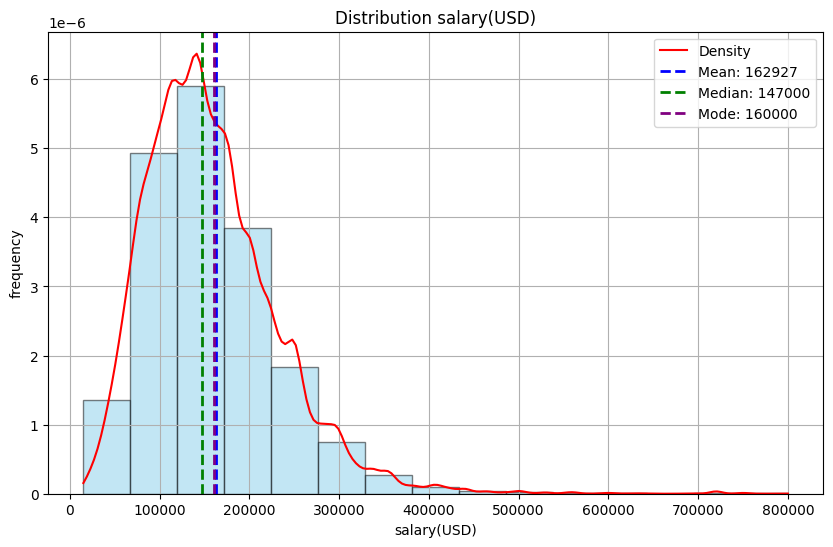

In [97]:
salaries=df["salary_in_usd"].values
plt.figure(figsize=(10, 6))
plt.hist(salaries, bins=15, density=True, alpha=0.5, color="skyblue", edgecolor="black");
density = gaussian_kde(salaries)
xs = np.linspace(min(salaries), max(salaries), 200)
plt.plot(xs, density(xs), color="red", label="Density")


plt.axvline(mean_val, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.0f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.0f}')
plt.axvline(mode_val, color='purple', linestyle='--', linewidth=2, label=f'Mode: {mode_val:.0f}')

plt.title("Distribution salary(USD)")
plt.xlabel("salary(USD)")
plt.ylabel("frequency")
plt.legend()
plt.grid(True)

- Sử dụng logarit để dữ liệu cân bằng hơn

Text(0, 0.5, 'frequency')

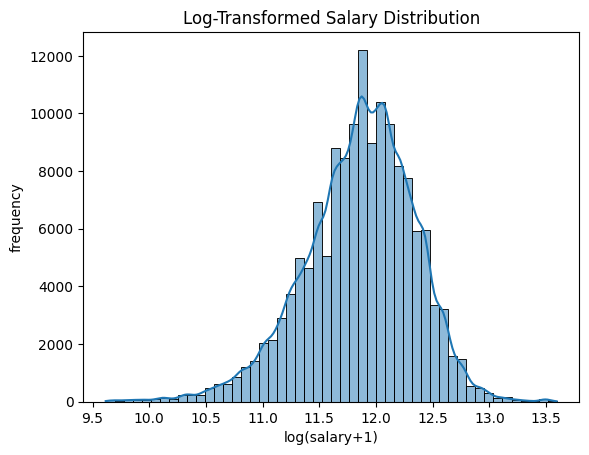

In [98]:
plt.Figure(figsize=(10,6))
sns.histplot(np.log1p(salaries), kde=True, bins=50);
plt.title("Log-Transformed Salary Distribution")
plt.xlabel("log(salary+1)")
plt.ylabel("frequency")



### Salary trend

In [99]:
yearly_stats = df.groupby('work_year')['salary_in_usd'].agg(['mean', 'median', 'std']).reset_index()
yearly_stats

,work_year,mean,median,std
0,2020,102250.866667,79833.0,82722.309481
1,2021,99922.073394,83872.0,67072.030451
2,2022,134146.471403,131300.0,57769.407446
3,2023,153682.160371,145000.0,65393.134368
4,2024,159589.557767,148945.0,73585.575323
5,2025,156899.968844,145000.0,75665.093837


In [100]:
fig=px.line(yearly_stats,x="work_year",y=["mean","median"],
            title="Salary trend 2020-2025",
            labels={'value': 'Salary (USD)', 'work_year': 'Year', 'variable': 'Metric'},
            template='plotly_white')

fig.update_layout(legend_title_text='', hovermode='x unified',
                 width=900, height=500)


fig.add_trace(go.Scatter(
    x=np.concatenate([yearly_stats['work_year'], yearly_stats['work_year'][::-1]]),
    y=np.concatenate([yearly_stats['mean'] + yearly_stats['std'], 
                    (yearly_stats['mean'] - yearly_stats['std'])[::-1]]),
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Standard Deviation'
))

fig.show()


* Có thể thấy rằng xu hướng lương đang dần mở rộng

### Experience level 

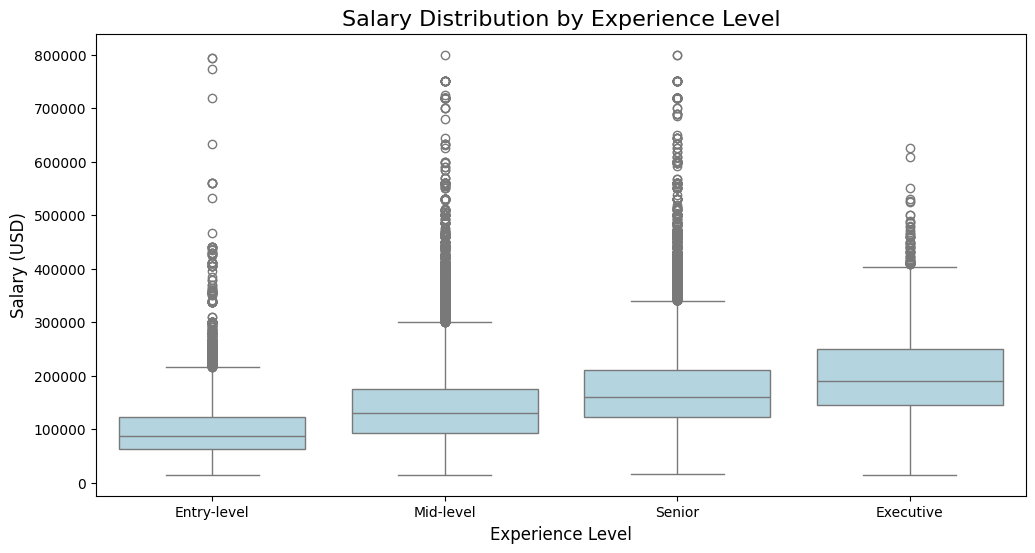

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['EN', 'MI', 'SE', 'EX'],color="lightblue")
plt.title('Salary Distribution by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Entry-level', 'Mid-level', 'Senior', 'Executive'])




plt.show()

* Kinh nghiệm càng nhiều lương càng cao
* Vị trí điều hành kiếm được nhiều hơn đáng kể so với các vị trí khác

In [102]:
exp_time = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index()
exp_time['experience_level'] = exp_time['experience_level'].replace({
    'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior', 'EX': 'Executive'
})
exp_time

,work_year,experience_level,salary_in_usd
0,2020,Entry-level,69840.666667
1,2020,Executive,179958.250000
2,2020,Mid-level,91870.935484
3,2020,Senior,138648.894737
4,2021,Entry-level,63463.065217
5,2021,Executive,186128.000000
6,2021,Mid-level,86818.390805
7,2021,Senior,125989.746667
8,2022,Entry-level,79464.085470
9,2022,Executive,184738.093023


In [103]:
fig = px.line(exp_time, x='work_year', y='salary_in_usd', color='experience_level',
             title='Salary Trends by Experience Level (2020-2025)',
             labels={'salary_in_usd': 'Average Salary (USD)', 'work_year': 'Year'},
             template='plotly_white')

fig.update_layout(width=900, height=500, hovermode='x unified')

### Geographical Analysis

In [104]:
country_dict = {
    'AD': 'Andorra',
    'AE': 'United Arab Emirates',
    'AM': 'Armenia',
    'AR': 'Argentina',
    'AS': 'American Samoa',
    'AT': 'Austria',
    'AU': 'Australia',
    'BA': 'Bosnia and Herzegovina',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'BM': 'Bermuda',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'CA': 'Canada',
    'CD': 'Democratic Republic of the Congo',
    'CF': 'Central African Republic',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'CN': 'China',
    'CO': 'Colombia',
    'CR': 'Costa Rica',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'DO': 'Dominican Republic',
    'DZ': 'Algeria',
    'EC': 'Ecuador',
    'EE': 'Estonia',
    'EG': 'Egypt',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'GB': 'United Kingdom',
    'GE': 'Georgia',
    'GH': 'Ghana',
    'GR': 'Greece',
    'GT': 'Guatemala',
    'HK': 'Hong Kong',
    'HN': 'Honduras',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IN': 'India',
    'IQ': 'Iraq',
    'IR': 'Iran',
    'IT': 'Italy',
    'JE': 'Jersey',
    'JM': 'Jamaica',
    'JO': 'Jordan',
    'JP': 'Japan',
    'KE': 'Kenya',
    'KR': 'South Korea',
    'KW': 'Kuwait',
    'LB': 'Lebanon',
    'LS': 'Lesotho',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'MD': 'Moldova',
    'MK': 'North Macedonia',
    'ML': 'Mali',
    'MT': 'Malta',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'NG': 'Nigeria',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'NZ': 'New Zealand',
    'OM': 'Oman',
    'PA': 'Panama',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PK': 'Pakistan',
    'PL': 'Poland',
    'PR': 'Puerto Rico',
    'PT': 'Portugal',
    'QA': 'Qatar',
    'RO': 'Romania',
    'RS': 'Serbia',
    'RU': 'Russia',
    'RW': 'Rwanda',
    'SA': 'Saudi Arabia',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'SV': 'El Salvador',
    'TH': 'Thailand',
    'TN': 'Tunisia',
    'TR': 'Turkey',
    'TW': 'Taiwan',
    'UA': 'Ukraine',
    'UG': 'Uganda',
    'US': 'United States',
    'UZ': 'Uzbekistan',
    'VE': 'Venezuela',
    'VN': 'Vietnam',
    'XK': 'Kosovo',
    'ZA': 'South Africa',
    'ZM': 'Zambia'
}

data=df.groupby("employee_residence")["salary_in_usd"].mean().reset_index()
data["country_name"]=data["employee_residence"].map(country_dict)

In [105]:
data

,employee_residence,salary_in_usd,country_name
0,AD,50745.000000,Andorra
1,AE,88333.333333,United Arab Emirates
2,AM,45453.200000,Armenia
3,AR,76551.325581,Argentina
4,AS,45555.000000,American Samoa
...,...,...,...
99,VE,192500.000000,Venezuela
100,VN,57200.000000,Vietnam
101,XK,41052.000000,Kosovo
102,ZA,65859.647887,South Africa


In [106]:
fig2 = px.choropleth(data,
                    locations='country_name',
                    locationmode='country names',
                    color='salary_in_usd',
                    hover_name='country_name',
                    hover_data=
                    {
                        'employee_residence': True, 
                        'salary_in_usd': ':,.0f'
                    },
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Salary by Employee Residence',
                    labels={'salary_in_usd': 'Average Adjusted Salary'},
                    projection='natural earth')

fig2.update_layout(width=1000, height=600)
fig2.show()

In [107]:
top_countries=data.sort_values("salary_in_usd",ascending=False).head(20)
top_countries

,employee_residence,salary_in_usd,country_name
80,QA,300000.000000,Qatar
14,CD,275000.000000,Democratic Republic of the Congo
99,VE,192500.000000,Venezuela
97,US,163903.153066,United States
44,IL,147321.733333,Israel
85,SA,139999.333333,Saudi Arabia
13,CA,129453.317303,Canada
6,AU,128959.646536,Australia
56,LB,128833.333333,Lebanon
18,CN,125404.000000,China


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14588\4036811383.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




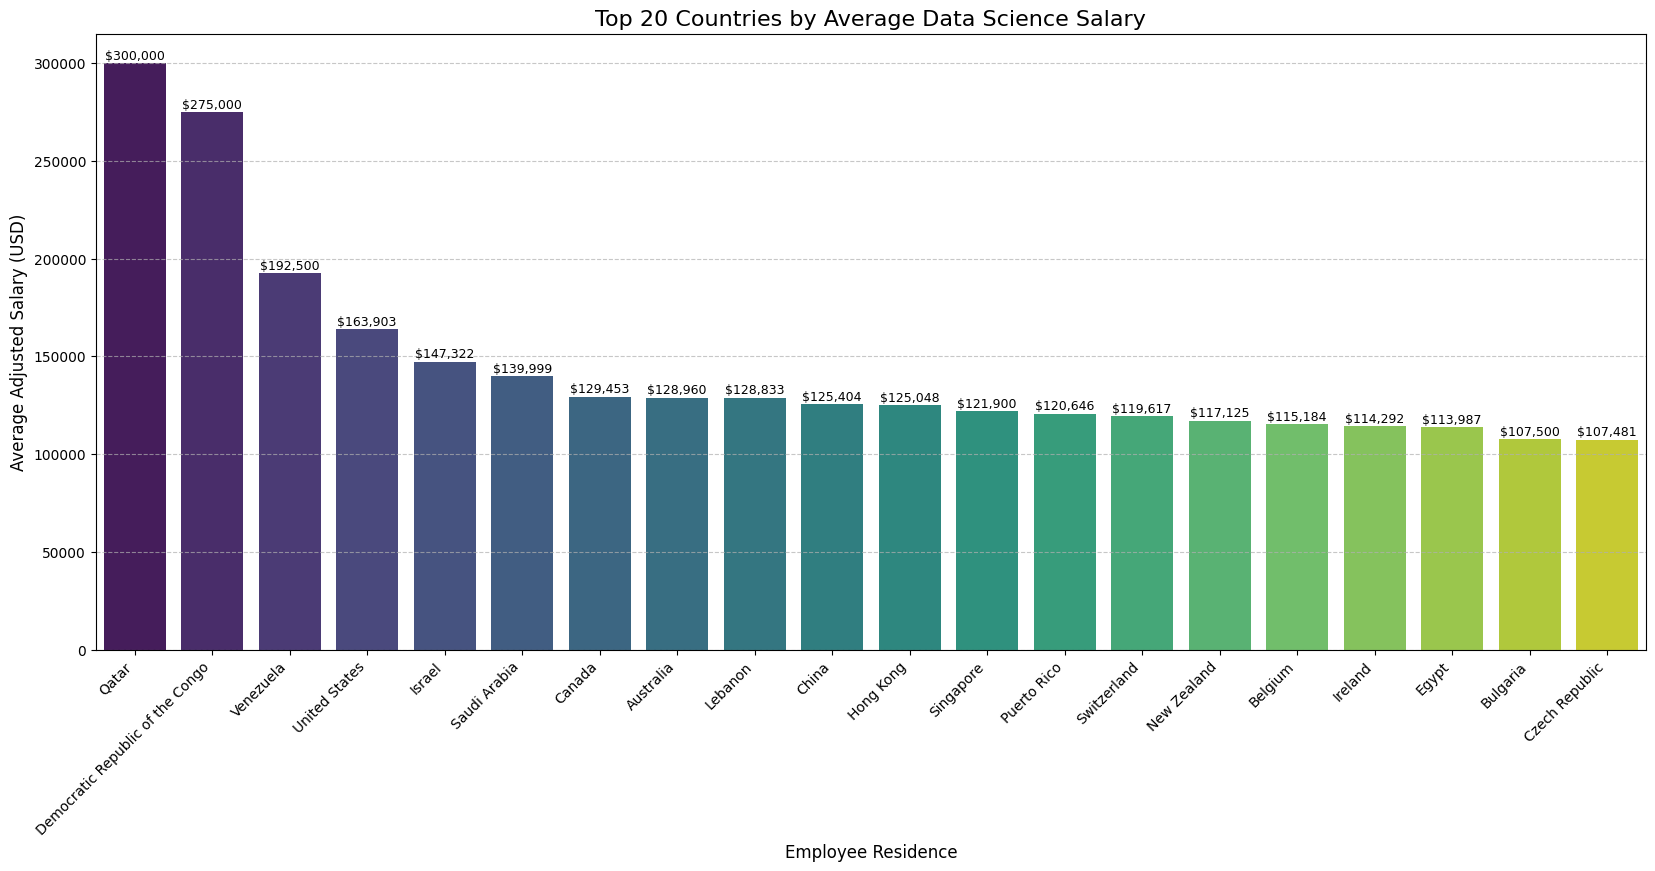

In [108]:
plt.figure(figsize=(20, 8))
chart = sns.barplot(x='country_name', y='salary_in_usd', data=top_countries, 
                    palette='viridis', order=top_countries['country_name']);
plt.title('Top 20 Countries by Average Data Science Salary', fontsize=16);
plt.xlabel('Employee Residence', fontsize=12);
plt.ylabel('Average Adjusted Salary (USD)', fontsize=12);
plt.xticks(rotation=45, ha='right');
plt.grid(axis='y', linestyle='--', alpha=0.7);

for i, bar in enumerate(chart.patches):
    chart.text(bar.get_x()+bar.get_width()/2., 
              bar.get_height() + 2000,
              f'${top_countries["salary_in_usd"].iloc[i]:,.0f}', 
              ha='center', fontsize=9)


# Machine Learning


In [109]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [110]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Analyst,142000,USD,142000,US,0,US,M
1,2025,MI,FT,Analyst,87000,USD,87000,US,0,US,M
2,2025,SE,FT,Data Quality Lead,218700,USD,218700,US,0,US,M
3,2025,SE,FT,Data Quality Lead,163200,USD,163200,US,0,US,M
4,2025,MI,FT,Data Quality Specialist,121524,USD,121524,US,0,US,M


### Feature engineer

In [111]:
df=df.drop(["salary","salary_currency"],axis=1)

In [112]:
df.corr(numeric_only=True)

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.016533,-0.075684
salary_in_usd,0.016533,1.000000,-0.045889
remote_ratio,-0.075684,-0.045889,1.000000


In [113]:
print("experience_level",df["experience_level"].unique())
print("work_year",df["work_year"].unique())
print("employment_type",df["employment_type"].unique())
print("employee_residence",df["employee_residence"].unique())
print("remote_ratio",df["remote_ratio"].unique())
print("company_location",df["company_location"].unique())
print("company_size",df["company_size"].unique())

experience_level ['MI' 'SE' 'EX' 'EN']
work_year [2025 2024 2023 2022 2020 2021]
employment_type ['FT' 'CT' 'PT' 'FL']
employee_residence ['US' 'CA' 'BE' 'GB' 'CH' 'GR' 'SG' 'SK' 'FR' 'NL' 'CZ' 'NZ' 'AU' 'ES'
 'IN' 'PL' 'DE' 'IT' 'AT' 'HR' 'FI' 'PR' 'AR' 'PT' 'BR' 'LT' 'IE' 'PH'
 'RO' 'ML' 'NO' 'CL' 'MY' 'SV' 'CO' 'DO' 'MX' 'GT' 'CR' 'LV' 'ZA' 'EE'
 'EG' 'JO' 'CY' 'UA' 'TH' 'JM' 'JP' 'MT' 'MK' 'SI' 'HK' 'LS' 'ID' 'PE'
 'HU' 'PA' 'LU' 'DZ' 'KE' 'CD' 'SE' 'KR' 'TW' 'TR' 'NG' 'DK' 'AE' 'BG'
 'RS' 'EC' 'XK' 'ZM' 'AM' 'RW' 'IL' 'LB' 'PK' 'HN' 'VE' 'BM' 'VN' 'GE'
 'SA' 'OM' 'BA' 'UG' 'MU' 'QA' 'RU' 'TN' 'GH' 'AD' 'MD' 'UZ' 'CF' 'KW'
 'IR' 'AS' 'CN' 'BO' 'IQ' 'JE']
remote_ratio [  0 100  50]
company_location ['US' 'CA' 'BE' 'GB' 'CH' 'GR' 'SG' 'SK' 'FR' 'NL' 'CZ' 'NZ' 'AU' 'ES'
 'IN' 'PL' 'DE' 'IT' 'AT' 'HR' 'FI' 'PR' 'AR' 'PT' 'BR' 'LT' 'IE' 'PH'
 'RO' 'ML' 'NO' 'CL' 'MY' 'SV' 'CO' 'DO' 'MX' 'GT' 'CR' 'LV' 'ZA' 'EE'
 'EG' 'JO' 'CY' 'UA' 'TH' 'JM' 'JP' 'MT' 'MK' 'SI' 'HK' 'LS' 'PE' 'HU'
 'PA'

In [114]:
print("job_title",df["job_title"].unique())

job_title ['Analyst' 'Data Quality Lead' 'Data Quality Specialist' 'Data Modeler'
 'Software Engineer' 'Machine Learning Engineer' 'Manager' 'Developer'
 'Engineer' 'Head of Data' 'Director' 'Data Scientist' 'Data Developer'
 'Research Scientist' 'Product Owner' 'Data Analyst' 'Data Engineer'
 'AI Engineer' 'Architect' 'Data Architect' 'Economist'
 'Software Development Engineer' 'Product Manager' 'Solutions Architect'
 'Backend Engineer' 'DevOps Engineer' 'Systems Engineer' 'Consultant'
 'Research Assistant' 'Solutions Engineer' 'Researcher'
 'Analytics Manager' 'Engineering Manager' 'Solution Engineer'
 'Research Specialist' 'Lead Engineer' 'Applied Scientist'
 'Data Operations' 'Solution Architect' 'Business Intelligence Engineer'
 'SAS Developer' 'Data Governance Manager' 'Business Intelligence Lead'
 'Software Developer' 'System Engineer' 'Staff Engineer'
 'Principal Engineer' 'Data Integration Lead' 'Data Governance'
 'Data Manager' 'Data Management' 'Data Management Lead'
 'Appl

In [115]:
def category_process(title):
    title_lower=title.lower()
    if "science" in title_lower or "scientist" in title_lower:
        return "Science"
    elif "analyst" in title_lower:
        return "Analyst"
    elif "engineer" in title_lower:
        return "Engineer"
    elif "manager" in title_lower or "head" in title_lower or "director" in title_lower:
        return "Manager"
    elif "developer" in title_lower:
        return "Developer"
    elif "architect" in title_lower:
        return "Architect"
    else:
        return "Other"
df["job_category"]=df["job_title"].apply(category_process)
df=df.drop("job_title",axis=1)

In [116]:
df.head()

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2025,MI,FT,142000,US,0,US,M,Analyst
1,2025,MI,FT,87000,US,0,US,M,Analyst
2,2025,SE,FT,218700,US,0,US,M,Other
3,2025,SE,FT,163200,US,0,US,M,Other
4,2025,MI,FT,121524,US,0,US,M,Other


In [117]:
country_to_region = {
    # Bắc Mỹ
    'US': 'North America', 'CA': 'North America', 'MX': 'North America', 'PR': 'North America', 'CR': 'North America',
    'PA': 'North America', 'SV': 'North America', 'HN': 'North America', 'GT': 'North America',

    # Nam Mỹ
    'BR': 'South America', 'AR': 'South America', 'CL': 'South America', 'CO': 'South America',
    'PE': 'South America', 'EC': 'South America', 'VE': 'South America', 'BO': 'South America',

    # Châu Âu
    'GB': 'Europe', 'DE': 'Europe', 'FR': 'Europe', 'ES': 'Europe', 'IT': 'Europe', 'NL': 'Europe', 'BE': 'Europe',
    'CH': 'Europe', 'PL': 'Europe', 'PT': 'Europe', 'FI': 'Europe', 'DK': 'Europe', 'NO': 'Europe',
    'SE': 'Europe', 'IE': 'Europe', 'LT': 'Europe', 'LV': 'Europe', 'EE': 'Europe', 'CZ': 'Europe',
    'SK': 'Europe', 'AT': 'Europe', 'HR': 'Europe', 'RO': 'Europe', 'BG': 'Europe', 'RS': 'Europe',
    'BA': 'Europe', 'MK': 'Europe', 'XK': 'Europe', 'LU': 'Europe', 'CY': 'Europe', 'MD': 'Europe',
    'AD': 'Europe', 'JE': 'Europe',

    # Châu Á
    'IN': 'Asia', 'CN': 'Asia', 'JP': 'Asia', 'VN': 'Asia', 'SG': 'Asia', 'MY': 'Asia', 'PH': 'Asia',
    'TH': 'Asia', 'HK': 'Asia', 'KR': 'Asia', 'TW': 'Asia', 'AE': 'Asia', 'QA': 'Asia', 'OM': 'Asia',
    'SA': 'Asia', 'KW': 'Asia', 'LB': 'Asia', 'IL': 'Asia', 'IR': 'Asia', 'IQ': 'Asia', 'AM': 'Asia',
    'GE': 'Asia', 'RU': 'Asia', 'PK': 'Asia', 'ID': 'Asia',

    # Châu Phi
    'ZA': 'Africa', 'NG': 'Africa', 'KE': 'Africa', 'GH': 'Africa', 'DZ': 'Africa', 'RW': 'Africa',
    'LS': 'Africa', 'MU': 'Africa', 'UG': 'Africa', 'ZM': 'Africa', 'CF': 'Africa', 'EG': 'Africa',
    'TN': 'Africa', 'ML': 'Africa',

    # Châu Đại Dương
    'AU': 'Oceania', 'NZ': 'Oceania', 'AS': 'Oceania',

    # Khác / Island
    'BM': 'Other'
}
df["region"] = df["employee_residence"].map(country_to_region).fillna("Other")
df["company_region"]=df["company_location"].map(country_to_region).fillna("Other")
df=df.drop(["employee_residence","company_location"],axis=1)


In [118]:
df.head()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,job_category,region,company_region
0,2025,MI,FT,142000,0,M,Analyst,North America,North America
1,2025,MI,FT,87000,0,M,Analyst,North America,North America
2,2025,SE,FT,218700,0,M,Other,North America,North America
3,2025,SE,FT,163200,0,M,Other,North America,North America
4,2025,MI,FT,121524,0,M,Other,North America,North America


### Regression

In [119]:
print(df['region'].value_counts(normalize=True))
print(df['job_category'].value_counts(normalize=True))
print(df['experience_level'].value_counts(normalize=True))


region
North America    0.936508
Europe           0.051425
Oceania          0.004400
Asia             0.003574
South America    0.001968
Africa           0.001114
Other            0.001011
Name: proportion, dtype: float64
job_category
Engineer     0.448431
Science      0.171816
Analyst      0.152322
Manager      0.088788
Other        0.082522
Architect    0.031446
Developer    0.024674
Name: proportion, dtype: float64
experience_level
SE    0.578477
MI    0.303455
EN    0.092014
EX    0.026054
Name: proportion, dtype: float64


- train, test split

In [120]:
x=df.drop("salary_in_usd",axis=1)
y=df["salary_in_usd"]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=43)
x_train

,work_year,experience_level,employment_type,remote_ratio,company_size,job_category,region,company_region
143998,2023,SE,FT,0,M,Engineer,North America,North America
98720,2024,SE,FT,100,M,Analyst,North America,North America
8035,2025,MI,FT,100,M,Engineer,North America,North America
35918,2025,MI,FT,0,M,Other,North America,North America
53516,2025,SE,FT,0,M,Developer,North America,North America
...,...,...,...,...,...,...,...,...
57651,2025,SE,FT,100,M,Other,North America,North America
129082,2024,SE,FT,0,M,Engineer,North America,North America
125205,2024,MI,FT,0,M,Science,North America,North America
40753,2025,SE,FT,0,M,Engineer,North America,North America


In [121]:
ordinal_column=["experience_level","employment_type","company_size"]
nominal_column=["job_category","region","company_region"]
numeric_column=["remote_ratio","work_year"]

exp=['EN', 'MI', 'SE', 'EX']
employ_type=['PT', 'CT', 'FT', 'FL']
company_size=['S', 'M', 'L']


ordinal_pipe=Pipeline(steps=[
        ("ordinal_pipe",OrdinalEncoder(categories=[exp,employ_type,company_size])),
        ("scaler",MinMaxScaler())
])

nominal_pipe=Pipeline(steps=[
    ("nominal_pipe",OneHotEncoder(handle_unknown="ignore"))
])

numeric_pipe=Pipeline(steps=[
    ("numeric_pipe",MinMaxScaler())
])

In [122]:
preprocessor = ColumnTransformer(transformers=[
    ("ordinal_pipe", ordinal_pipe, ordinal_column),
    ("nominal_pipe", nominal_pipe, nominal_column),
    ("numeric_pipe", numeric_pipe, numeric_column)
])

X_train_transformed = preprocessor.fit_transform(x_train)
X_test_transformed  = preprocessor.transform(x_test)


In [ ]:
models_params = [
    {
        "name": "RandomForestRegressor",
        "model": RandomForestRegressor(random_state=43),
        "params": {
            "model__n_estimators": [100,150,200],
            "model__criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"]
        }
    },
    {
        "name": "GradientBoostingRegressor",
        "model": GradientBoostingRegressor(),
        "params": {
            "model__loss": ["squared_error", "absolute_error", "huber", "quantile"],
            "model__learning_rate": [0.05, 0.1, 0.2],
            "model__n_estimators": [100,150,200],
            "model__criterion": ["friedman_mse", "squared_error"]
        }
    }
]

for mp in models_params:
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", mp["model"])
    ])
    
    grid = GridSearchCV(pipe, mp["params"], cv=5, scoring="r2", n_jobs=-1)
    grid.fit(x_train, y_train)
    print(f"{mp['name']} best score: {grid.best_score_}")
    print(f"{mp['name']} best params: {grid.best_params_}")